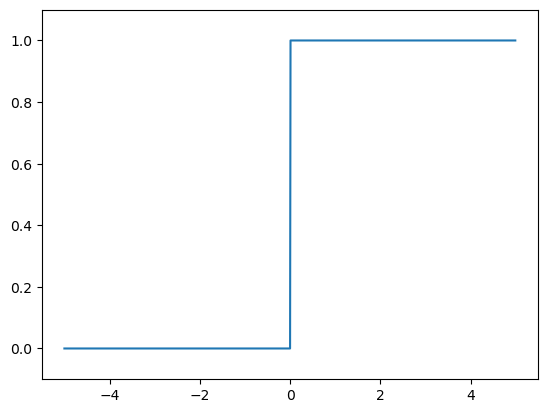

In [11]:
import numpy as np
import matplotlib.pylab as plt


# ステップ関数
def step_function(x):
    return np.array(x > 0, dtype=np.int64)


x = np.arange(-5.0, 5.0, 0.01)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

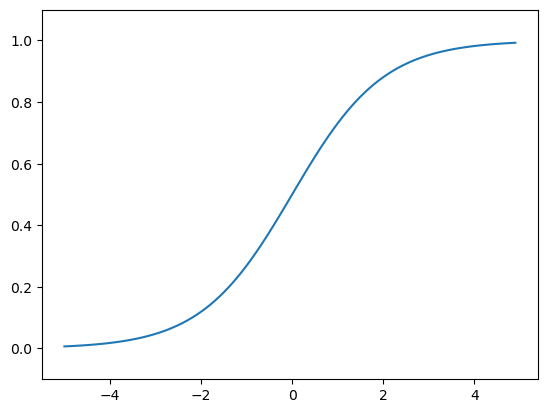

In [12]:
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

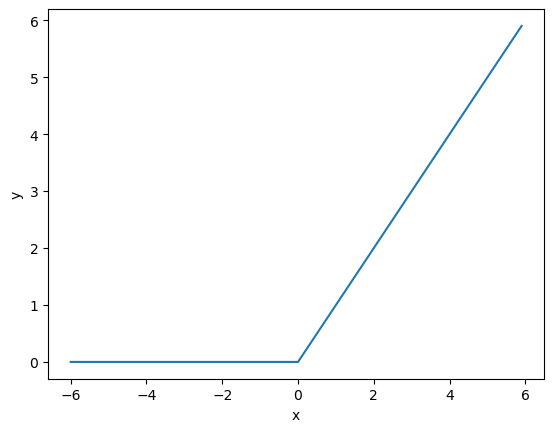

In [13]:
def relu(x):
    return np.maximum(0, x)


x = np.arange(-6, 6, 0.1)
y = relu(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [14]:
import numpy as np

A = np.array([1, 2, 3, 4])
print(A)
np.ndim(A)  # 次元数
A.shape
A.shape[0]

[1 2 3 4]


4

In [15]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
np.ndim(B)

[[1 2]
 [3 4]
 [5 6]]


2

In [16]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
np.dot(A, B)

array([[19, 22],
       [43, 50]])

# ニューラルネットワークの実装

In [17]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

In [18]:
print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [19]:
A1 = np.dot(X, W1) + B1  # 第一層
A1

array([0.3, 0.7, 1.1])

In [20]:
# 活性関数にシグモイド関数を使用
Z1 = sigmoid(A1)
Z1

array([0.57444252, 0.66818777, 0.75026011])

In [21]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])  # 2層目の重み
B2 = np.array([0.1, 0.2])  # バイアス

A2 = np.dot(Z1, W2) + B2  # 二層目の値
# 活性関数にシグモイド関数を使用
Z2 = sigmoid(A2)

In [22]:
print(A2)
print(Z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [23]:
# 最終層から出力層への信号伝達
def identity_function(x):
    return x


W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)  # これはようするに、Y = A3

In [24]:
Y

array([0.31682708, 0.69627909])

# ニューラルネットワーク実装のまとめ

In [25]:
def init_network():
    """層の重みやバイアスを定義"""
    network = {}
    network["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network["b1"] = np.array([0.1, 0.2, 0.3])
    network["W2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network["b2"] = np.array([0.1, 0.2])
    network["W3"] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network["b3"] = np.array([0.1, 0.2])

    return network


def forward(network, x):
    """入力信号を出力へまとめて変換するプロセスをまとめて記述"""
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    z3 = np.dot(z2, W3) + b3
    y = identity_function(z3)

    return y


network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


# 出力層の設計

In [26]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633


In [27]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [28]:
# ソフトマックス関数
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [29]:
# ソフトマックス関数(オーバーフロー対策済)
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)  # オーバーフロー対策
    sum_exp_a = np.sum(exp_a)

    y = exp_a / sum_exp_a
    return y

# 手書き数字認識

In [30]:
import sys, os

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [31]:
print(x_train)
print(t_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[5 0 4 ... 5 6 8]


In [32]:
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()


img = x_train[0]
label = t_train[0]
print(label)

5


In [ ]:
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

(784,)
(28, 28)


Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)
Loading "original-fs" failed
Error: Cannot find module 'original-fs'
Require stack:
- /home/kuro/.vscode-server/cli/servers/Stable-fee1edb8d6d72a0ddff41e5f71a671c23ed924b9/server/out/server-cli.js
    at Module._resolveFilename (node:internal/modules/cjs/loader:1145:15)
    at Module._load (node:internal/modules/cjs/loader:986:27)
    at Module.require (node:internal/modules/cjs/loader:1233:19)
    at require (node:internal/modules/helpers:179:18)
    at i (/home/kuro/.vscode-server/cli/servers/Stable-fee1edb8d6d72a0ddff41e5f71a671c23ed924b9/server/out/server-cli.js:3:98)
    at r.load (/home/kuro/.vscode-server/cli/servers/Stable-fee1edb8d6d72a0ddff41e5f71a671c23ed924b9/server/out/server-cli.js:2:1637)
    at h.load (/home/kuro/.vscode-server/cli/servers/Stable-fee1edb8d6d72a0ddff41e5f71a671c23ed924b9/server/out/server-cli.js:1:13958)
    at u (/home/kuro/

In [34]:
img_show(img)

Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)
Loading "original-fs" failed
Error: Cannot find module 'original-fs'
Require stack:
- /home/kuro/.vscode-server/cli/servers/Stable-fee1edb8d6d72a0ddff41e5f71a671c23ed924b9/server/out/server-cli.js
    at Module._resolveFilename (node:internal/modules/cjs/loader:1145:15)
    at Module._load (node:internal/modules/cjs/loader:986:27)
    at Module.require (node:internal/modules/cjs/loader:1233:19)
    at require (node:internal/modules/helpers:179:18)
    at i (/home/kuro/.vscode-server/cli/servers/Stable-fee1edb8d6d72a0ddff41e5f71a671c23ed924b9/server/out/server-cli.js:3:98)
    at r.load (/home/kuro/.vscode-server/cli/servers/Stable-fee1edb8d6d72a0ddff41e5f71a671c23ed924b9/server/out/server-cli.js:2:1637)
    at h.load (/home/kuro/.vscode-server/cli/servers/Stable-fee1edb8d6d72a0ddff41e5f71a671c23ed924b9/server/out/server-cli.js:1:13958)
    at u (/home/kuro/

In [44]:
import pickle


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(
        normalize=True, flatten=True, one_hot_label=False
    )
    return x_test, t_test


def init_network():
    with open("../ch03/sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [45]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # もっとも確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [47]:
# バッチ処理

X, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i : i + batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i : i + batch_size])


print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
